In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.decomposition import PCA

C:\Users\Esysss\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [19]:
with open('Sources/foreheads.pickle', 'rb') as handle:
    foreheads = pickle.load(handle)

In [49]:
new_pixels = []
for forehead in foreheads:
    pca = PCA(n_components=5)
    pca.fit(forehead[:,:,1])
    new_pixels.append(pca.transform(forehead[:,:,1]))

In [96]:
pixel_counter = []
for forehead in new_pixels:
    pixel_counter.append(np.sum(forehead[:,4]))

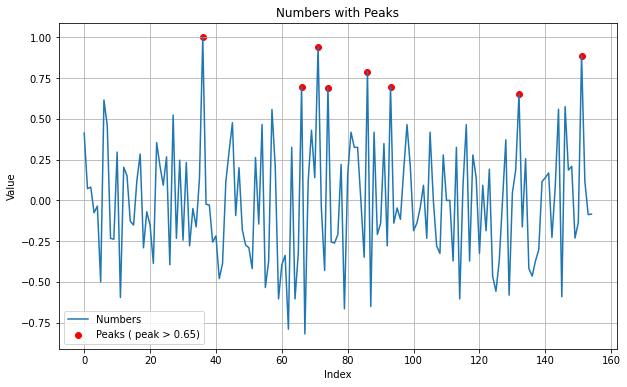

In [97]:
numbers  = pixel_counter/max(pixel_counter)
# Create a list to store peak values and their indices
peaks = [(index, value) for index, value in enumerate(numbers) if value > 0.65]

# Separate indices and values of peaks for plotting
peak_indices, peak_values = zip(*peaks)

# Plotting the list of numbers
plt.figure(figsize=(10, 6))
plt.plot(numbers, label='Numbers')
plt.scatter(peak_indices, peak_values, color='red', marker='o', label='Peaks ( peak > 0.65)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Numbers with Peaks')
plt.legend()
plt.grid(True)
plt.show()

### we have this:
$$
Heart Rate = P \times \frac{60}{q_2 - q_1}
$$

In [98]:
Heart_Rate = len(peaks) * (60/(peaks[-1][0]/30)-(peaks[0][0]/30)) #My camera is 30fps
Heart_Rate

85.76423841059604

In [99]:
# to make the foreheads more notacable to the model we can modify the green channel

In [104]:
pixel = []
period = 25
for forehead in foreheads:
    pixel.append(np.mean(forehead[:,:,1]))
mean = np.mean(pixel)
mean

152.94349456884623

In [106]:
gen_foreheads = []
for i, forehead in enumerate(foreheads):
        temp_mean = np.mean(forehead[:,:,1])
        x = mean - temp_mean
        new_data = forehead
        if i%period == 0:
            new_data[:,:,1] = new_data[:,:,1] + x + 20
        else:
            new_data[:,:,1] = new_data[:,:,1] + x
        gen_foreheads.append(new_data)

In [112]:
new_pixels = []
for forehead in gen_foreheads:
    pca = PCA(n_components=5)
    pca.fit(forehead[:,:,1])
    new_pixels.append(pca.transform(forehead[:,:,1]))

In [128]:
pixel_counter = []
for forehead in new_pixels:
    pixel_counter.append(np.sum(forehead[:,0]))

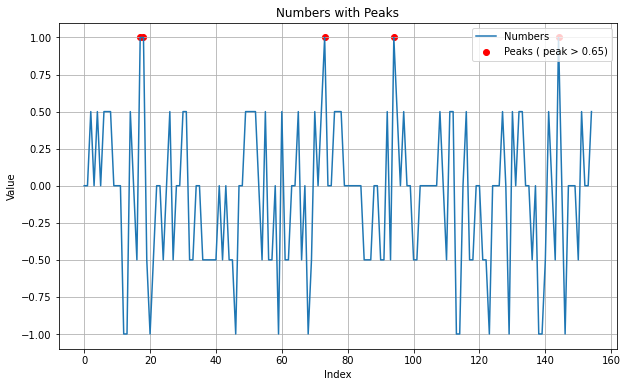

In [129]:
numbers  = pixel_counter/max(pixel_counter)
# Create a list to store peak values and their indices
peaks = [(index, value) for index, value in enumerate(numbers) if value > 0.65]

# Separate indices and values of peaks for plotting
peak_indices, peak_values = zip(*peaks)

# Plotting the list of numbers
plt.figure(figsize=(10, 6))
plt.plot(numbers, label='Numbers')
plt.scatter(peak_indices, peak_values, color='red', marker='o', label='Peaks ( peak > 0.65)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Numbers with Peaks')
plt.legend()
plt.grid(True)
plt.show()

In [133]:
Heart_Rate = len(peaks) * (60/(peaks[-1][0]/30)-(peaks[0][0]/30)) #My camera is 30fps
Heart_Rate

59.66666666666667